In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Import data
data = pd.read_csv("./Data/test data.csv")
data.head()
data = data.iloc[:900]

In [3]:
# colums = ["hour","min","second","x_raw","x_kal1","x_kal2","x_kal3","x_kal4","x_kal5","label"]

In [4]:
# Label function
def thresh_label(col,threshold):
    """
    Take in list and threshold to binary classification. 
    If values is LOWER than thresh, we classify as 1 else 0
    """
    out = []
    for i in col:
        if i > threshold:
            out.append(0)
        else:
            out.append(1)
    return out

# Pred thesh function
""" 
If values is HIGHER than thresh, we classify as 1 else 0
"""
def thresh_preds(col,threshold):
    """
    Take in list and threshold to binary classification
    """
    out = []
    for i in col:
        if i > threshold:
            out.append(1)
        else:
            out.append(0)
    return out

In [5]:
# Threshold labels and set as true labels:
new_labels = thresh_label(data.iloc[:,3],75)
new_preds = thresh_preds(data.iloc[:,2].tolist(),42)
print(type(new_labels),new_labels)
print(type(data.iloc[:,5].tolist()),data.iloc[:,5].tolist())



<class 'list'> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
# Make new dataframe
df = pd.DataFrame({"x_kalman1":data.iloc[:,5].tolist(),
                   "labels":new_labels,
                   "Model Confidence Prediction":data.iloc[:,2].tolist(),
                   "Model Thresholded Prediction":new_preds,
                   "min":data.iloc[:,0].tolist(),
                   "sec":data.iloc[:,1].tolist()})
df.head()

,x_kalman1,labels,Model Confidence Prediction,Model Thresholded Prediction,min,sec
0,0.02,0,0,0,6,4
1,0.02,0,0,0,6,4
2,0.01,0,0,0,6,4
3,0.01,0,0,0,6,4
4,0.00,0,0,0,6,4


Since different accelerometers have different resting defaults, we must see the first set of values 

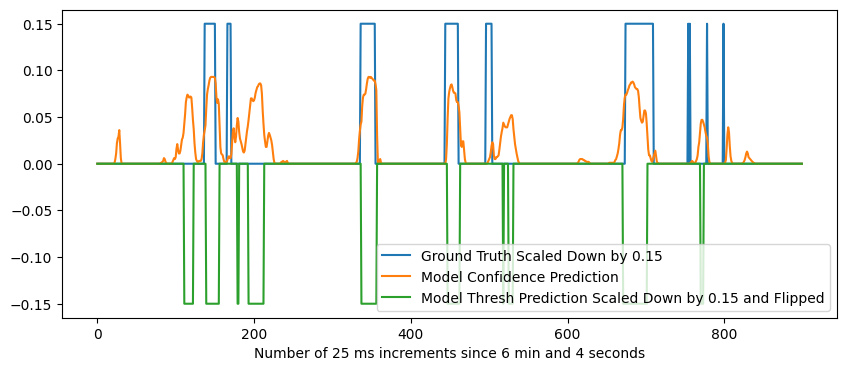

In [7]:
plt.figure(figsize=(10,4))

plt.plot([x*0.15 for x in df.iloc[:,1]],label = "Ground Truth Scaled Down by 0.15")
plt.plot([x/1000 for x in df.iloc[:,2]],label = "Model Confidence Prediction")
plt.plot([-x*0.15 for x in df.iloc[:,3]],label = "Model Thresh Prediction Scaled Down by 0.15 and Flipped")

plt.xlabel("Number of 25 ms increments since 6 min and 4 seconds")
plt.legend()

plt.show()

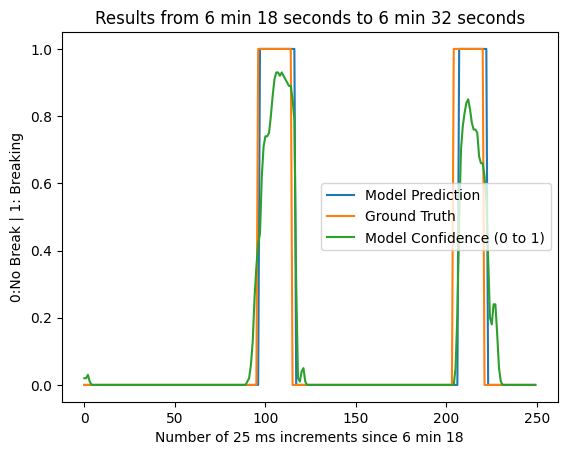

In [8]:

#EXTRACT good points
points = [
    [240,440],
    [370,490],
    [565,750],
    [240,490]
]
good_data = [df.iloc[point[0]:point[1]] for point in points]
# print(good_data[0])
selection = good_data[3]
# plt.plot(selection.iloc[:,2].tolist())
plt.title(f"Results from {selection.iloc[:,4].tolist()[0]} min {selection.iloc[:,5].tolist()[0]} seconds to {selection.iloc[:,4].tolist()[-1]} min {selection.iloc[:,5].tolist()[-1]} seconds")
plt.plot(selection.iloc[:,3].tolist(), label = "Model Prediction")
plt.plot(selection.iloc[:,1].tolist(),label = "Ground Truth")

plt.plot([x/100 for x in selection.iloc[:,2].tolist()],label = "Model Confidence (0 to 1)")

# plt.plot()
plt.xlabel(f"Number of 25 ms increments since {selection.iloc[:,4].tolist()[0]} min {selection.iloc[:,5].tolist()[0]}")
plt.ylabel("0:No Break | 1: Breaking")
plt.legend()
plt.show()




In [9]:
# Save cutouts of data:
for index, d in enumerate(good_data):
    
    dataframe = pd.DataFrame(good_data[index])
    dataframe = dataframe.drop(['x_kalman1'],axis=1)
    # print(dataframe.columns)

    dataframe.to_csv(f"./Data/good_data{points[index][0]}_to_{points[index][1]}.csv")



In [10]:
# Save cutouts of data:
for index, d in enumerate(good_data):
    
    dataframe = pd.DataFrame(good_data[index])
    # dataframe = dataframe.drop(['x_kalman1'],axis=1)
    # print(dataframe.columns)

    dataframe.to_csv(f"./Data/good_data{points[index][0]}_to_{points[index][1]}_w_xkal.csv")

